### Подготовка

In [ ]:
pip install blocksnet folium matplotlib mapclassify -qq

In [ ]:
from blocksnet import City

Считываем собранную на прошлых занятиях модель в переменную

In [ ]:
Priozersk = City.from_pickle('/content/priozersk_school_and_kindergarten_model.pickle')

In [ ]:
Priozersk

In [ ]:
print(Priozersk)

CRS : EPSG:32636
Blocks : 258
Service types : 2/71
Buildings : 2995
Services : 12



### Методы работы с моделью

###### Метод оценки разнообразися сервисов в кварталах, основанный на [индексе Шеннона](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%80%D0%B0_%D1%80%D0%B0%D0%B7%D0%BD%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%B8%D1%8F).

In [ ]:
from blocksnet import Diversity

In [ ]:
diversity = Diversity(city_model=Priozersk)
result_devirsity = diversity.calculate()

In [ ]:
result_devirsity

,geometry,diversity
id,,
0,"POLYGON ((346286.758 6770604.937, 346269.532 6...",NaN
1,"POLYGON ((345527.406 6769713.349, 345503.118 6...",NaN
2,"POLYGON ((344997.065 6769717.807, 344958.481 6...",0.693147
3,"POLYGON ((346807.756 6771341.845, 346758.641 6...",NaN
4,"POLYGON ((346770.121 6769792.395, 346761.799 6...",NaN
...,...,...
253,"POLYGON ((343625.747 6770130.054, 343573.762 6...",NaN
254,"POLYGON ((343573.762 6770163.437, 343529.946 6...",NaN
255,"POLYGON ((343529.946 6770192.054, 343494.932 6...",NaN


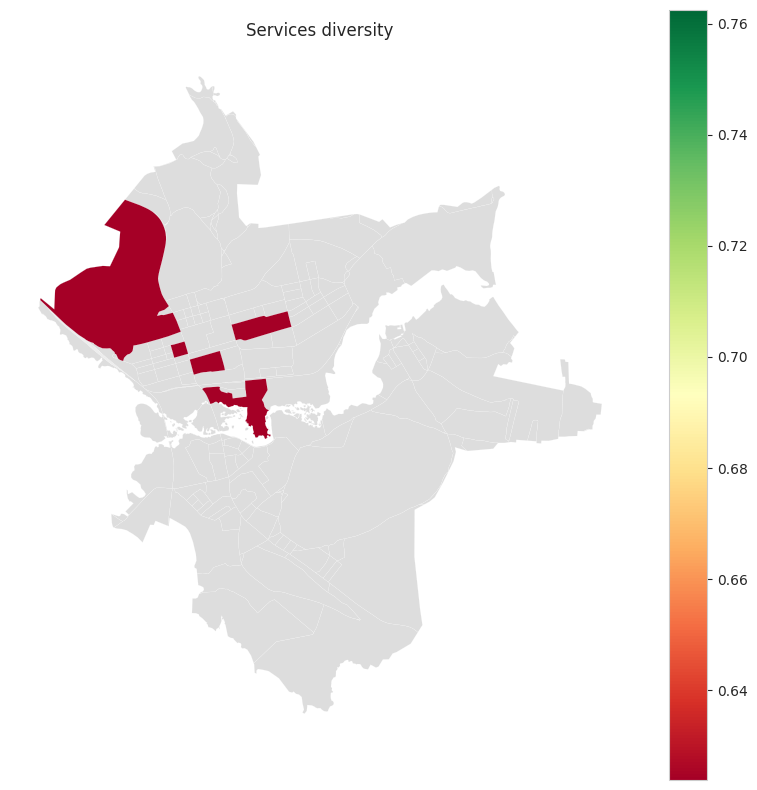

In [ ]:
Diversity.plot(result_devirsity, figsize =(10,10))

###### Методы вычисления центральности кварталов города:

1. ```Centrality``` - оценка центральности по транспортной связности и разнообразию сервисов в кварталах;
2. ```PopulationCentrality``` - оценка центральности по транспортной связности и населению в кварталах.

In [ ]:
from blocksnet import Centrality, PopulationCentrality

In [ ]:
centrality = Centrality(city_model=Priozersk)
result_centrality = centrality.calculate()

In [ ]:
result_centrality

,geometry,connectivity,density,diversity,centrality
id,,,,,
0,"POLYGON ((346286.758 6770604.937, 346269.532 6...",4.542969,NaN,NaN,NaN
1,"POLYGON ((345527.406 6769713.349, 345503.118 6...",3.207031,NaN,NaN,NaN
2,"POLYGON ((344997.065 6769717.807, 344958.481 6...",2.587891,0.000009,0.693147,0.077525
3,"POLYGON ((346807.756 6771341.845, 346758.641 6...",7.621094,NaN,NaN,NaN
4,"POLYGON ((346770.121 6769792.395, 346761.799 6...",5.804688,NaN,NaN,NaN
...,...,...,...,...,...
253,"POLYGON ((343625.747 6770130.054, 343573.762 6...",3.972656,NaN,NaN,NaN
254,"POLYGON ((343573.762 6770163.437, 343529.946 6...",3.972656,NaN,NaN,NaN
255,"POLYGON ((343529.946 6770192.054, 343494.932 6...",3.218750,NaN,NaN,NaN


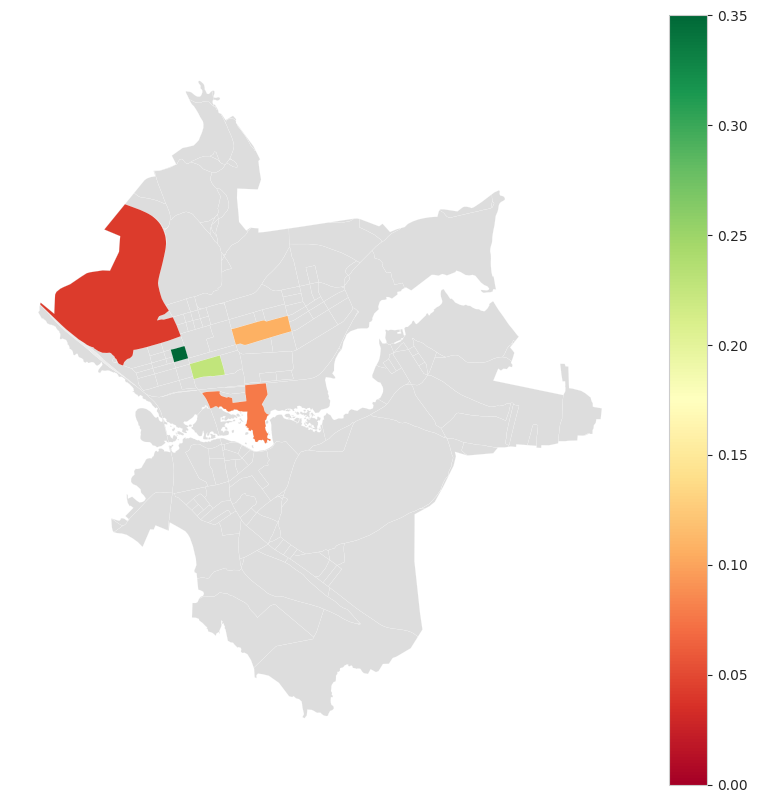

In [ ]:
Centrality.plot(result_centrality, figsize =(10,10))

In [ ]:
centrality_population = PopulationCentrality(city_model=Priozersk)

In [ ]:
result_centrlity_population = centrality_population.calculate()

In [ ]:
result_centrlity_population

,geometry,population_centrality
id,,
0,"POLYGON ((346286.758 6770604.937, 346269.532 6...",1.35
1,"POLYGON ((345527.406 6769713.349, 345503.118 6...",2.78
2,"POLYGON ((344997.065 6769717.807, 344958.481 6...",5.56
3,"POLYGON ((346807.756 6771341.845, 346758.641 6...",0.09
4,"POLYGON ((346770.121 6769792.395, 346761.799 6...",1.36
...,...,...
254,"POLYGON ((343573.762 6770163.437, 343529.946 6...",0.81
255,"POLYGON ((343529.946 6770192.054, 343494.932 6...",1.21
256,"POLYGON ((343409.830 6770318.092, 343270.800 6...",1.03


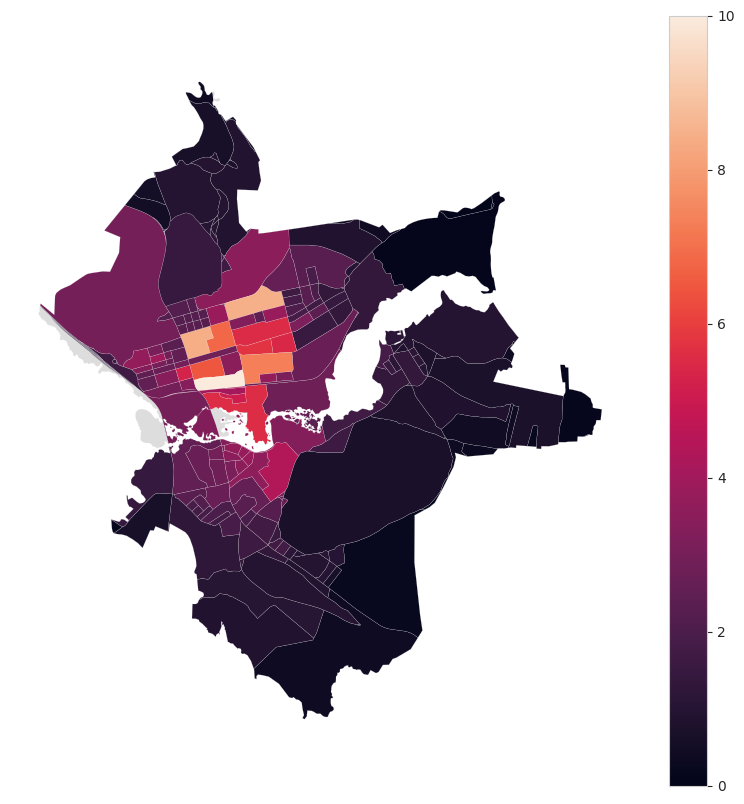

In [ ]:
PopulationCentrality.plot(result_centrlity_population, figsize =(10,10))

###### Метрика оценки кварталов [SpaceMatrix](https://books.open.tudelft.nl/home/catalog/book/38).

In [ ]:
from blocksnet import Spacematrix

In [ ]:
spacematrix = Spacematrix(city_model=Priozersk)
result_spacematrix = spacematrix.calculate()

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f3eddabec20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


In [ ]:
result_spacematrix

,geometry,l,fsi,mxi,strelka_morphotype,spacematrix_cluster,spacematrix_morphotype
id,,,,,,,
0,"POLYGON ((346286.758 6770604.937, 346269.532 6...",1.000000,0.148553,0.000000,Малоэтажная нежилая застройка,4.0,Малоэтажный низкоплотный нежилой
1,"POLYGON ((345527.406 6769713.349, 345503.118 6...",1.000000,0.059138,0.000000,Малоэтажная нежилая застройка,4.0,Малоэтажный низкоплотный нежилой
2,"POLYGON ((344997.065 6769717.807, 344958.481 6...",1.465852,0.073879,0.405771,Индивидуальная жилая застройка,8.0,Малоэтажный низкоплотный смешанный
3,"POLYGON ((346807.756 6771341.845, 346758.641 6...",1.000000,0.052797,0.000000,Малоэтажная нежилая застройка,4.0,Малоэтажный низкоплотный нежилой
4,"POLYGON ((346770.121 6769792.395, 346761.799 6...",1.000000,0.023866,0.348570,Индивидуальная жилая застройка,8.0,Малоэтажный низкоплотный смешанный
...,...,...,...,...,...,...,...
253,"POLYGON ((343625.747 6770130.054, 343573.762 6...",NaN,0.000000,NaN,NaN,NaN,NaN
254,"POLYGON ((343573.762 6770163.437, 343529.946 6...",NaN,0.000000,NaN,NaN,NaN,NaN
255,"POLYGON ((343529.946 6770192.054, 343494.932 6...",NaN,0.000000,NaN,NaN,NaN,NaN


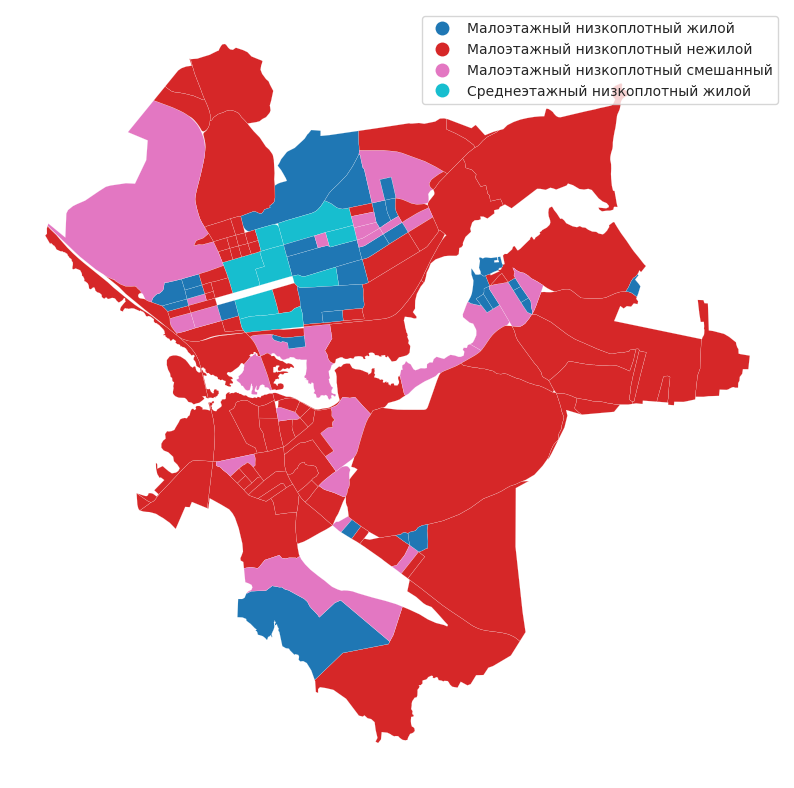

In [ ]:
Spacematrix.plot(result_spacematrix, figsize =(10,10))

###### Метод определения типа землепользования квартала (LandUse) на основе сущетсвующих в модели городских сервисов.

In [ ]:
from blocksnet import LandUsePrediction

In [ ]:
lup = LandUsePrediction(city_model=Priozersk)

In [ ]:
result_lup = lup.calculate()

100%|██████████| 258/258 [00:01<00:00, 200.70it/s]


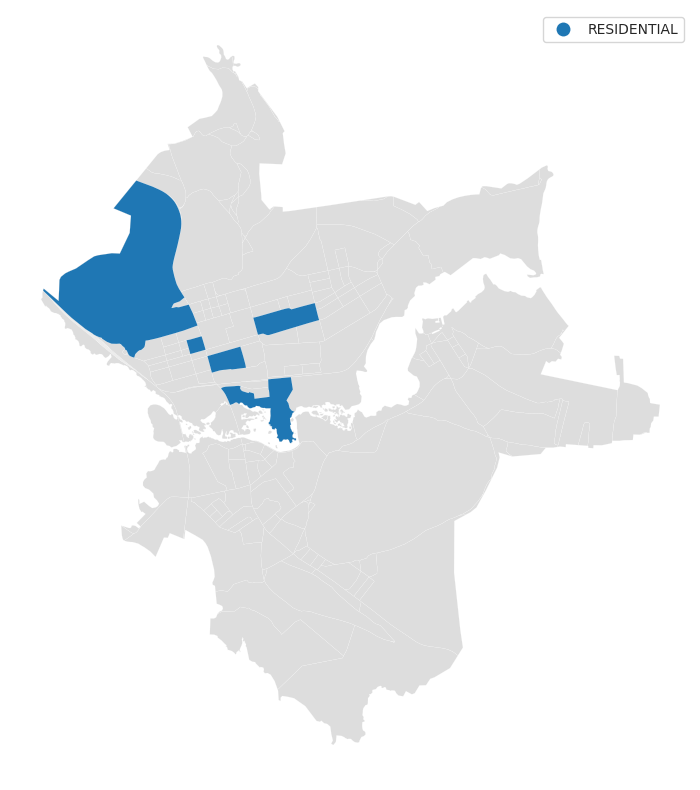

In [ ]:
LandUsePrediction.plot(result_lup)

###### Метод определения [свободной площади](https://www.sciencedirect.com/science/article/pii/S1877050923020306) в квартале.

In [ ]:
from blocksnet import VacantArea

In [ ]:
va = VacantArea(city_model=Priozersk)

In [ ]:
gdf_blocks = Priozersk.get_blocks_gdf(simplify=True)

In [ ]:
gdf_blocks.explore()

In [ ]:
block = Priozersk[103] # выбранный квартал
result_va = va.calculate([block])

Error encountered: No data elements in server response. Check log and query location/tags.
Error encountered: No data elements in server response. Check log and query location/tags.
Error encountered: No data elements in server response. Check log and query location/tags.


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:2475: UserWarning: `keep_geom_type=True` in overlay resulted in 26 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [ ]:
result_va.explore()